In [2]:
import os
import pandas as pd

In [2]:
# !mkdir data/liver-ultrasound-detection-unzip/images
# !mkdir data/liver-ultrasound-detection-unzip/labels
# !mkdir data/liver-ultrasound-detection-unzip/images/train
# !mkdir data/liver-ultrasound-detection-unzip/labels/train
# !mkdir data/liver-ultrasound-detection-unzip/images/val
# !mkdir data/liver-ultrasound-detection-unzip/labels/val
# !mkdir data/liver-ultrasound-detection-unzip/images/test

# !mv data/liver-ultrasound-detection-unzip/train/train/images/* data/liver-ultrasound-detection-unzip/images/train
# !mv data/liver-ultrasound-detection-unzip/train/train/annotations/* data/liver-ultrasound-detection-unzip/labels/train

# !mv data/liver-ultrasound-detection-unzip/val/val/images/* data/liver-ultrasound-detection-unzip/images/val
# !mv data/liver-ultrasound-detection-unzip/val/val/annotations/* data/liver-ultrasound-detection-unzip/labels/val

# !mv data/liver-ultrasound-detection-unzip/test/test/images/* data/liver-ultrasound-detection-unzip/images/test
# !mv data/liver-ultrasound-detection-unzip/images/test/images/* data/liver-ultrasound-detection-unzip/images/test

# !mkdir data/liver-ultrasound-detection-unzip/datasets
# !mv data/liver-ultrasound-detection-unzip/images data/liver-ultrasound-detection-unzip/datasets
# !mv data/liver-ultrasound-detection-unzip/labels data/liver-ultrasound-detection-unzip/datasets
# !mv data/liver-ultrasound-detection-unzip/datasets/images data/liver-ultrasound-detection-unzip
# !mv data/liver-ultrasound-detection-unzip/datasets/labels data/liver-ultrasound-detection-unzip
# !mkdir data/liver-ultrasound-detection-unzip/images

In [3]:
# !rm -r data/liver-ultrasound-detection-unzip/train
# !rm -r data/liver-ultrasound-detection-unzip/val
# # !rmdir /content/test/test/images
# # !rmdir /content/test/test
# !rm -r data/liver-ultrasound-detection-unzip/test

In [6]:
ROOT = 'data/liver-ultrasound-detection-unzip/'

In [7]:
print('Number of train images : ' + str(len(os.listdir(ROOT + 'images/train'))))
print('Number of train labels : ' + str(len(os.listdir(ROOT + 'labels/train'))))

Number of train images : 14448
Number of train labels : 7222


In [8]:
print('Number of val images : ' + str(len(os.listdir(ROOT + 'images/val'))))
print('Number of val labels : ' + str(len(os.listdir(ROOT + 'labels/val'))))

Number of val images : 4898
Number of val labels : 2445


In [9]:
print('Number of test images : ' + str(len(os.listdir(ROOT + 'images/test'))))

Number of test images : 5153


In [10]:
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageDraw

def draw_bounding_boxes(image, annotation_file):
    with open(annotation_file, 'r') as file:
        lines = file.readlines()

    width, height = image.size
    draw = ImageDraw.Draw(image)

    for line in lines:
        class_id, x_center, y_center, w, h = map(float, line.strip().split())
        x_center *= width
        y_center *= height
        w *= width
        h *= height

        xmin = int(x_center - w / 2)
        ymin = int(y_center - h / 2)
        xmax = int(x_center + w / 2)
        ymax = int(y_center + h / 2)

        draw.rectangle([xmin, ymin, xmax, ymax], outline="red", width=2)

    return image

def display_images_in_grid(image_folder, annotation_folder, grid_size=(4, 5), image_format='jpg'):
    # Get list of image files
    image_files = [f for f in os.listdir(image_folder) if f.endswith(image_format)]

    # Create a figure with specified grid size
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(15, 10))

    # Loop through the grid and plot images
    for i, ax in enumerate(axes.flat):
        if i < len(image_files):
            img_path = os.path.join(image_folder, image_files[i])
            ann_path = os.path.join(annotation_folder, image_files[i].replace('.jpg', '.txt'))

            img = Image.open(img_path)
            if os.path.exists(ann_path):
                img = draw_bounding_boxes(img, ann_path)

            ax.imshow(img)
            ax.set_title(image_files[i])
            ax.axis('off')  # Hide axes
        else:
            ax.axis('off')  # Hide empty subplots

    plt.tight_layout()
    plt.show()

def show_image_with_bounding_boxes(image_folder, annotation_folder, image_file):
    img_path = os.path.join(image_folder, image_file)
    ann_path = os.path.join(annotation_folder, image_file.replace('.jpg', '.txt'))

    img = Image.open(img_path)
    if os.path.exists(ann_path):
        img = draw_bounding_boxes(img, ann_path)

    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title(image_file)
    plt.axis('off')  # Hide axes
    plt.show()

# # Specify the folders containing the images and annotations
# image_folder = 'path_to_your_image_folder'
# annotation_folder = 'path_to_your_annotation_folder'

# # Display images in a grid
# display_images_in_grid(image_folder, annotation_folder)

# # Show a single image with bounding boxes
# image_file = 'example.jpg'  # Replace with your image file name
# show_image_with_bounding_boxes(image_folder, annotation_folder, image_file)


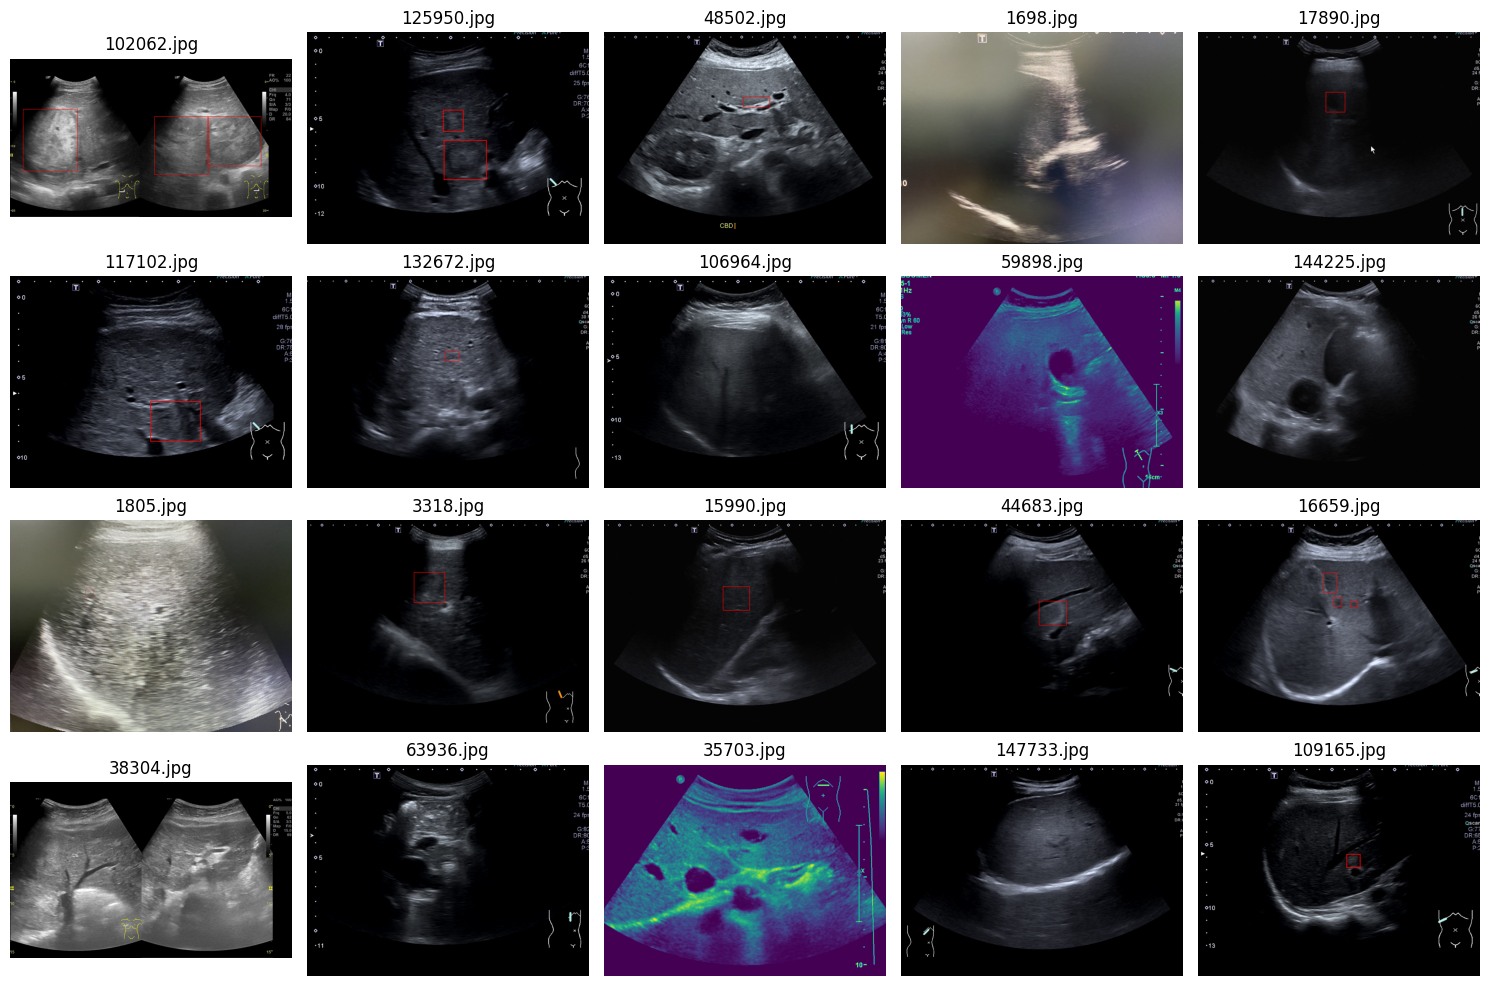

In [11]:
# Specify the folders containing the images and annotations
image_folder = ROOT + 'images/val'
annotation_folder = ROOT + 'labels/val'

# Display images in a grid
display_images_in_grid(image_folder, annotation_folder)

In [13]:
import cv2
from matplotlib import pyplot as plt

def read_bounding_boxes(file_path):
    bounding_boxes = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 5:
                label = int(parts[0])  # Assuming the label is an integer
                x_center = float(parts[1])
                y_center = float(parts[2])
                width = float(parts[3])
                height = float(parts[4])
                bounding_boxes.append([label, x_center, y_center, width, height])
    return bounding_boxes

def write_bboxes(image_path, bboxes_path, path=True):

    # Load your image
    if path:
      image = cv2.imread(image_path)
      # Load the bounding boxes
      bounding_boxes = read_bounding_boxes(bboxes_path)
    else:
      image = image_path
      bounding_boxes = bboxes_path

    # Image dimensions
    height, width, _ = image.shape

    # Iterate through the bounding boxes and draw them on the image
    for box in bounding_boxes:
        label, x_center, y_center, w, h = box
        x1 = int((x_center - w / 2) * width)
        y1 = int((y_center - h / 2) * height)
        x2 = int((x_center + w / 2) * width)
        y2 = int((y_center + h / 2) * height)
        
        color = (0, 255, 0)  # BGR color for the bounding box (green in this case)
        thickness = 2  # Thickness of the bounding box lines
        cv2.rectangle(image, (x1, y1), (x2, y2), color, thickness)
        
        text = f'{label}'
        cv2.putText(image, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)

    # Display the image with bounding boxes using matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide axis
    plt.show()

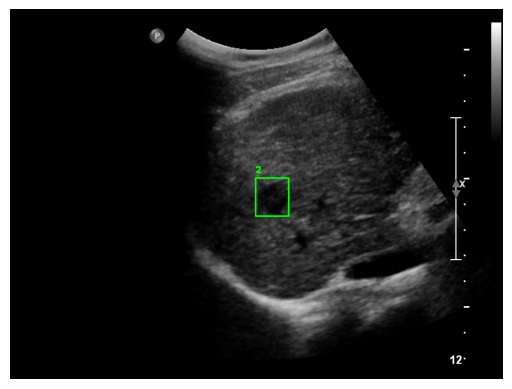

In [19]:
# Specify the folders containing the images and annotations
image_folder = ROOT + 'images/val/100367.jpg'
annotation_folder = ROOT + 'labels/val/100367.txt'

write_bboxes(image_folder, annotation_folder)

In [36]:
import numpy as np
from PIL import Image, ImageDraw, ImageFilter
import matplotlib.pyplot as plt
import random

def add_random_soft_glare(image, num_glares=5, min_radius=0, max_radius=100, intensity=0.5):
    overlay = Image.new('RGBA', image.size, (255, 255, 255, 0))
    width, height = image.size
    draw = ImageDraw.Draw(overlay)

    for _ in range(num_glares):
        # Random position near the corners and edges
        positions = [
            (random.randint(min_radius, max_radius), random.randint(min_radius, height)),  # Left edge
            (random.randint(width - max_radius, width), random.randint(min_radius, height)),  # Right edge
            (random.randint(min_radius, width), random.randint(min_radius, max_radius)),  # Top edge
            (random.randint(min_radius, width), random.randint(height - max_radius, height))  # Bottom edge
        ]
        position = random.choice(positions)

        # Random radius
        radius = random.randint(20, max_radius)

        # Create an ellipse to represent the glare
        left_up = (position[0] - radius, position[1] - radius)
        right_down = (position[0] + radius, position[1] + radius)
        draw.ellipse([left_up, right_down], fill=(255, 255, 255, int(255 * intensity)))

    # Apply a Gaussian blur to the glare to soften the edges
    overlay = overlay.filter(ImageFilter.GaussianBlur(radius/2))

    # Apply the glare overlay to the image
    return Image.alpha_composite(image.convert('RGBA'), overlay).convert('RGB')

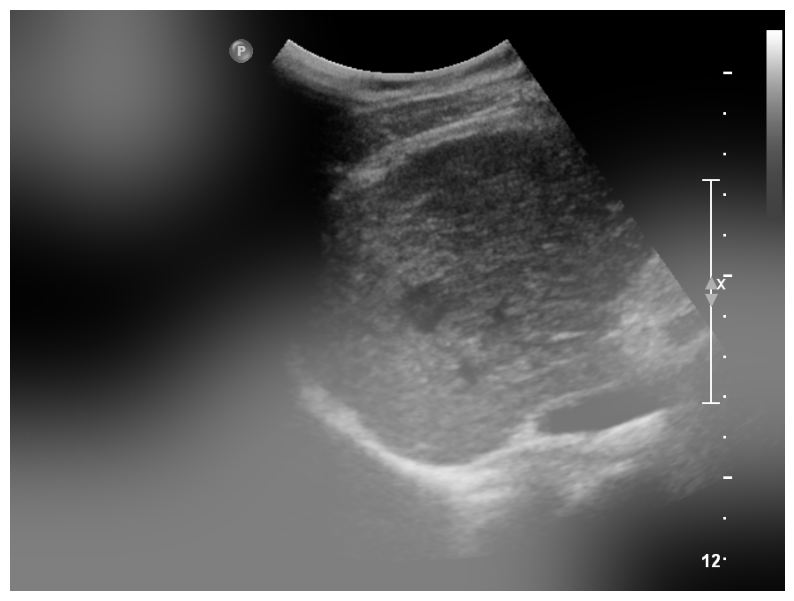

In [63]:
# Specify the folders containing the images and annotations
image_folder = ROOT + 'images/val/100367.jpg'
annotation_folder = ROOT + 'labels/val/100367.txt'

image = Image.open(image_folder)

# Add random soft glare
image = add_random_soft_glare(image, num_glares=5, min_radius=50, max_radius=300, intensity=0.5)

# write_bboxes(image_folder, annotation_folder)
plt.figure(figsize=(10, 8))
plt.imshow(np.array(image.getdata(), dtype=np.uint8).reshape(image.height, image.width, 3))
plt.axis('off')  # Hide axes
plt.show()

In [108]:
import cv2
import numpy as np
import random

def generate_random_rectangle_flare(image):
    """
    Generates a rectangle flare on an image.

    Args:
      image: The input image as a NumPy array.
      center_x: X-coordinate of the center of the flare rectangle.
      center_y: Y-coordinate of the center of the flare rectangle.
      width: Width of the flare rectangle.
      height: Height of the flare rectangle.
      intensity: Intensity of the flare (0.0 to 1.0).
      color: Color of the flare (BGR format).

    Returns:
      The image with the rectangle flare applied.
    """
    b = random.random()
    while b < 0.8:
        b = random.random()
    color=(int(b*255), 255, 255)

    intensity = random.random()
    while intensity > 0.5 or intensity < 0.2 :
        intensity = random.random()
    
    # Number of rectangles which can be in image
    number_rects_list = list(range(1,10))
    
    # Random choice from a possible rect
    num_rect = random.choice(number_rects_list)
    
    # Create a mask with the flare shape
    mask = np.zeros_like(image)
    
    # Get height, width from image
    h, w, _ = image.shape
    
    width = int(random.random()*w)
    height = int(random.random()*h)
    
    for rect_idx in range(num_rect):
        random_center_x = random.random()
        random_center_y = random.random()
        
        while (random_center_x > 0.2 and random_center_x < 0.8) or (random_center_y > 0.2 and random_center_y < 0.8) :
            random_center_x = random.random()
            random_center_y = random.random()

        random_center_x = int(random_center_x * w)
        random_center_y = int(random_center_y * h)
        

    # Add rectangle mask

        mask = cv2.rectangle(mask, (random_center_x - 500, random_center_y - 200),
                    (random_center_x + 500, random_center_y + 200), color, -1)

    # Blur the mask to create a smooth transition
    # Adjust width or height based on your needs (one must be odd)
    mask = cv2.GaussianBlur(mask, (width*2+1, height*2+1), 0)

    # Apply the mask to the flare and add it to the image
    image = cv2.addWeighted(image, 1-intensity, mask, intensity, 0)
    
    # Convert BGR2RGB
    image_with_flare = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

    return image_with_flare

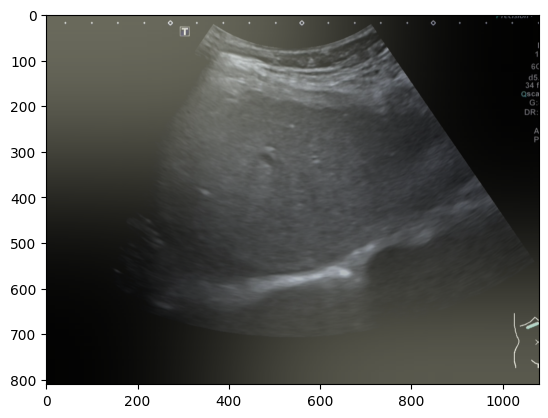

In [109]:
# Load your image
image = cv2.imread(ROOT + 'images/train/100010.jpg')

# Generate the flare and apply it to the image
image_with_flare = generate_random_rectangle_flare(image)

# Display or save the image with flare
plt.imshow(image_with_flare)
# plt.axis('off')
plt.show()

In [30]:
# !mkdir data/data_preprocess/
# !mkdir data/data_preprocess/images
# !mkdir data/data_preprocess/labels
# !mkdir data/data_preprocess/images/train
# !mkdir data/data_preprocess/labels/train
# !mkdir data/data_preprocess/images/val
# !mkdir data/data_preprocess/labels/val
# !mkdir data/data_preprocess/images/test

# !mkdir data/data_preprocess/

In [3]:
mapping = pd.read_excel('data/liver-ultrasound-detection-unzip/mapping.xlsx')
mapping

,Image File,Annotation File,Source,Type
0,24084.jpg,24084.txt,machine,machine_positive
1,97528.jpg,97528.txt,machine,machine_positive
2,54563.jpg,54563.txt,machine,machine_positive
3,115211.jpg,115211.txt,machine,machine_positive
4,71913.jpg,71913.txt,machine,machine_positive
...,...,...,...,...
19341,1160.jpg,NaN,mobile,mobile_negative
19342,153.jpg,NaN,mobile,mobile_negative
19343,130705.jpg,NaN,mobile,mobile_negative
19344,812.jpg,NaN,mobile,mobile_negative


In [4]:
mapping['assign'] = ''

In [12]:
name_list = ['folk', 'o', 'kit', 'bb', 'diw', 'jj', 'kp', 'tc', 'thee', 'ton']
for name, i in enumerate(range(0,17200,2150)):
    mapping.loc[i:i+2150,'assign'] = name_list[name] 

In [13]:
mapping['assign'][mapping['assign'] == ''] = name_list[-1]

,Image File,Annotation File,Source,Type,assign
0,24084.jpg,24084.txt,machine,machine_positive,folk
1,97528.jpg,97528.txt,machine,machine_positive,folk
2,54563.jpg,54563.txt,machine,machine_positive,folk
3,115211.jpg,115211.txt,machine,machine_positive,folk
4,71913.jpg,71913.txt,machine,machine_positive,folk
...,...,...,...,...,...
19341,1160.jpg,NaN,mobile,mobile_negative,
19342,153.jpg,NaN,mobile,mobile_negative,
19343,130705.jpg,NaN,mobile,mobile_negative,
19344,812.jpg,NaN,mobile,mobile_negative,


In [32]:
# ~mapping['Annotation File'][mapping['Image File'] == '1160.jpg'].isna().values[0]

# Augment data with add noise

In [33]:
# from tqdm import tqdm
# for folder in ['val', 'train']:
#     for img in tqdm(os.listdir('data/liver-ultrasound-detection-unzip/images/' + folder)):
#         src_img = 'data/liver-ultrasound-detection-unzip/images/' + folder + '/' + img
#         if mapping['Source'][mapping['Image File'] == img].values[0] == 'machine':
#             image = cv2.imread(src_img)
#             # Generate the flare and apply it to the image
#             image_with_flare = generate_random_rectangle_flare(image)
#             cv2.imwrite('data/data_preprocess/images/' + folder + '/prepro_' + img, image_with_flare)

#             if ~mapping['Annotation File'][mapping['Image File'] == img].isna().values[0]:
#                 src_label = 'data/liver-ultrasound-detection-unzip/labels/' + folder + '/' + img[:-4] + '.txt'
#                 des_label = 'data/data_preprocess/labels/' + folder + '/prepro_' + img[:-4] + '.txt'
#                 !cp {src_label} {des_label}
        
#         des_img = 'data/data_preprocess/images/' + folder + '/' + img 
#         !cp {src_img} {des_img}

#         if ~mapping['Annotation File'][mapping['Image File'] == img].isna().values[0]:
#             src_label = 'data/liver-ultrasound-detection-unzip/labels/' + folder + '/' + img[:-4] + '.txt'
#             des_label = 'data/data_preprocess/labels/' + folder + '/' + img[:-4] + '.txt'
#             !cp {src_label} {des_label}

In [34]:
os.listdir('data/data_preprocess/images')

['test', 'val', 'train']

In [35]:
ROOT = 'data/data_preprocess/'

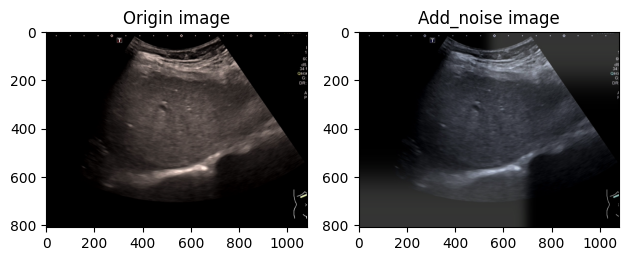

In [36]:
# Load your image
orig_img = cv2.imread(ROOT + 'images/train/100010.jpg')
prepro_img = cv2.imread(ROOT + 'images/train/prepro_100010.jpg')
# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Display images in subplots
ax1.imshow(orig_img)
ax2.imshow(prepro_img)

# Optional: Add titles and adjust layout
ax1.set_title('Origin image')
ax2.set_title('Add_noise image')
# fig.suptitle('Two Images')
plt.tight_layout()

# Display the plot
plt.show()

In [37]:
print('Number of train images : ' + str(len(os.listdir(ROOT + 'images/train'))))

Number of train images : 28447


In [38]:
# !cp data/liver-ultrasound-detection-unzip/images/test/* data/data_preprocess/images/test

In [39]:
print('Number of test images : ' + str(len(os.listdir(ROOT + 'images/test'))))

Number of test images : 5153


In [40]:
print('Number of test images : ' + str(len(os.listdir('data/liver-ultrasound-detection-unzip/images/test'))))

Number of test images : 5153


In [41]:
ROOT

'data/data_preprocess/'

In [42]:
import yaml

# Define the data to be written to the YAML file
data = {
    'path': ROOT,
    'train': 'images/train',
    'val': 'images/val',
    'test': 'images/test',
    'names': {
        0: 'FFC',
        1: 'FFS',
        2: 'HCC',
        3: 'cyst',
        4: 'hemangioma',
        5: 'dysplastic',
        6: 'CCA'
    }
}

# Write the data to a YAML file
with open(ROOT + 'data.yml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False, sort_keys=False)

print("YAML file written successfully.")

YAML file written successfully.


In [5]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov9e.pt')

In [44]:
model.info()

YOLOv9e summary: 1225 layers, 58206592 parameters, 0 gradients, 193.0 GFLOPs


(1225, 58206592, 0, 193.01565439999996)

In [45]:
results = model.train(data='./data/data_preprocess/data.yml', epochs=50, batch=32) 

Ultralytics YOLOv8.2.23 🚀 Python-3.9.19 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40338MiB)
engine/trainer: task=detect, mode=train, model=yolov9e.pt, data=./data/data_preprocess/data.yml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

train: Scanning /lustrefs/disk/project/lt900127-ai24k3/Jupyter/data/data_preprocess/labels/train... 14221 images, 14226 backgrounds, 0 corrupt: 100%|██████████| 28447/28447 [00:56<00:00, 501.62it/s]


train: New cache created: /lustrefs/disk/project/lt900127-ai24k3/Jupyter/data/data_preprocess/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /lustrefs/disk/project/lt900127-ai24k3/Jupyter/data/data_preprocess/labels/val... 4444 images, 4453 backgrounds, 0 corrupt: 100%|██████████| 8897/8897 [00:21<00:00, 412.91it/s]


val: New cache created: /lustrefs/disk/project/lt900127-ai24k3/Jupyter/data/data_preprocess/labels/val.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 298 weight(decay=0.0), 310 weight(decay=0.0005), 309 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      39.1G      2.031       4.17      1.728         44        640: 100%|██████████| 889/889 [11:10<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [01:00<00:00,  2.33it/s]


                   all       8897       5316      0.326      0.264      0.216     0.0918

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      38.3G      1.899      2.362       1.58         27        640: 100%|██████████| 889/889 [10:54<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:54<00:00,  2.58it/s]


                   all       8897       5316      0.355      0.306      0.249      0.104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      38.4G      2.009      2.513      1.663         27        640: 100%|██████████| 889/889 [10:43<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:53<00:00,  2.63it/s]


                   all       8897       5316      0.273      0.226      0.149      0.058

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      38.2G      2.068      2.625      1.706         41        640: 100%|██████████| 889/889 [10:40<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:52<00:00,  2.64it/s]


                   all       8897       5316      0.364      0.266      0.235      0.101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      38.4G      1.969      2.286      1.653         30        640: 100%|██████████| 889/889 [10:40<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:52<00:00,  2.64it/s]


                   all       8897       5316      0.448      0.352      0.332      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      38.2G      1.882      2.041      1.591         29        640: 100%|██████████| 889/889 [10:40<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:53<00:00,  2.63it/s]


                   all       8897       5316       0.52      0.446      0.434      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      38.4G      1.823      1.845       1.55         50        640: 100%|██████████| 889/889 [10:44<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:53<00:00,  2.63it/s]


                   all       8897       5316      0.527      0.472      0.481      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      38.3G      1.776       1.71       1.53         40        640: 100%|██████████| 889/889 [10:42<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:53<00:00,  2.62it/s]

                   all       8897       5316      0.583      0.464      0.496      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      38.4G      1.741      1.628      1.513         46        640: 100%|██████████| 889/889 [10:42<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:53<00:00,  2.64it/s]

                   all       8897       5316      0.634      0.501      0.545       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      38.2G      1.692      1.512      1.481         30        640: 100%|██████████| 889/889 [10:40<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:53<00:00,  2.60it/s]

                   all       8897       5316      0.612      0.541      0.569      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      38.4G      1.677      1.444       1.47         41        640: 100%|██████████| 889/889 [10:43<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:53<00:00,  2.61it/s]

                   all       8897       5316      0.655      0.565      0.599      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      38.2G      1.641      1.376      1.449         36        640: 100%|██████████| 889/889 [10:44<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:54<00:00,  2.59it/s]


                   all       8897       5316      0.644      0.571      0.606      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      38.4G      1.606      1.312       1.43         36        640: 100%|██████████| 889/889 [10:45<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:53<00:00,  2.62it/s]

                   all       8897       5316      0.637      0.615      0.632      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      38.2G      1.577      1.253      1.412         29        640: 100%|██████████| 889/889 [10:40<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:52<00:00,  2.65it/s]

                   all       8897       5316       0.67      0.593      0.634      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      38.4G      1.546      1.199      1.397         29        640: 100%|██████████| 889/889 [10:40<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:53<00:00,  2.63it/s]

                   all       8897       5316      0.688      0.613      0.655      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      38.2G      1.513      1.141      1.375         23        640: 100%|██████████| 889/889 [10:40<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:52<00:00,  2.68it/s]

                   all       8897       5316      0.706      0.622      0.661      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      38.3G      1.488      1.099      1.365         26        640: 100%|██████████| 889/889 [10:39<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:53<00:00,  2.63it/s]

                   all       8897       5316      0.696      0.643      0.675      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      38.2G      1.457      1.046      1.337         32        640: 100%|██████████| 889/889 [10:41<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:53<00:00,  2.63it/s]


                   all       8897       5316      0.687      0.662      0.679      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      38.4G      1.432      1.011      1.326         30        640: 100%|██████████| 889/889 [10:43<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:53<00:00,  2.61it/s]

                   all       8897       5316      0.711      0.635      0.684      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      38.2G      1.401     0.9723      1.315         30        640: 100%|██████████| 889/889 [10:45<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:53<00:00,  2.64it/s]

                   all       8897       5316      0.738      0.654      0.692       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      38.4G      1.379     0.9434      1.296         33        640: 100%|██████████| 889/889 [10:44<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:53<00:00,  2.63it/s]

                   all       8897       5316      0.719      0.657      0.695      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      38.2G      1.343     0.9029      1.285         34        640: 100%|██████████| 889/889 [10:40<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:51<00:00,  2.70it/s]

                   all       8897       5316      0.694      0.668      0.689       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      38.3G      1.319     0.8619      1.261         32        640: 100%|██████████| 889/889 [10:39<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:51<00:00,  2.70it/s]

                   all       8897       5316      0.733      0.652      0.695      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      38.2G      1.292     0.8341      1.247         34        640: 100%|██████████| 889/889 [10:43<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:53<00:00,  2.61it/s]

                   all       8897       5316       0.71      0.671      0.695      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      38.4G       1.27     0.8079      1.233         33        640: 100%|██████████| 889/889 [10:41<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:51<00:00,  2.69it/s]

                   all       8897       5316      0.733      0.664      0.699      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      38.2G      1.228     0.7672      1.213         27        640: 100%|██████████| 889/889 [10:40<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:51<00:00,  2.71it/s]

                   all       8897       5316      0.743      0.662      0.703      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      38.4G      1.213     0.7536      1.203         29        640: 100%|██████████| 889/889 [10:40<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:51<00:00,  2.71it/s]

                   all       8897       5316      0.723      0.675        0.7      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      38.2G      1.187     0.7287      1.183         41        640: 100%|██████████| 889/889 [10:40<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:51<00:00,  2.71it/s]

                   all       8897       5316      0.736      0.661      0.698      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      38.4G      1.162     0.7045      1.171         38        640: 100%|██████████| 889/889 [10:39<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:51<00:00,  2.72it/s]

                   all       8897       5316      0.736      0.668      0.698      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      38.2G      1.142     0.6876      1.159         22        640: 100%|██████████| 889/889 [10:40<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:52<00:00,  2.68it/s]

                   all       8897       5316      0.728      0.676        0.7      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      38.3G      1.105     0.6552      1.139         31        640: 100%|██████████| 889/889 [10:40<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:51<00:00,  2.72it/s]

                   all       8897       5316       0.73      0.677      0.701      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      38.2G       1.09     0.6419       1.13         31        640: 100%|██████████| 889/889 [10:39<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:51<00:00,  2.72it/s]

                   all       8897       5316      0.728      0.681      0.703      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      38.4G      1.055     0.6196      1.114         48        640: 100%|██████████| 889/889 [10:40<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:51<00:00,  2.72it/s]


                   all       8897       5316       0.73      0.678      0.701      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      38.2G      1.032     0.5989      1.099         31        640: 100%|██████████| 889/889 [10:41<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:52<00:00,  2.66it/s]

                   all       8897       5316      0.731      0.674      0.701      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      38.3G      1.002     0.5818      1.084         44        640: 100%|██████████| 889/889 [10:44<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:52<00:00,  2.67it/s]

                   all       8897       5316      0.728      0.673      0.701      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      38.2G      0.972     0.5616      1.067         26        640: 100%|██████████| 889/889 [10:48<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:52<00:00,  2.65it/s]


                   all       8897       5316       0.73      0.673      0.701      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      38.4G     0.9541     0.5477      1.056         42        640: 100%|██████████| 889/889 [10:43<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:52<00:00,  2.68it/s]

                   all       8897       5316      0.735      0.669        0.7      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      38.2G     0.9319     0.5359      1.046         26        640: 100%|██████████| 889/889 [10:39<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:51<00:00,  2.70it/s]

                   all       8897       5316      0.746      0.665      0.699      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      38.4G      0.911     0.5147      1.033         39        640: 100%|██████████| 889/889 [10:41<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:52<00:00,  2.68it/s]

                   all       8897       5316       0.75      0.662      0.698      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      38.2G     0.8809     0.5016      1.023         32        640: 100%|██████████| 889/889 [10:40<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:51<00:00,  2.71it/s]

                   all       8897       5316      0.752      0.657      0.696      0.372


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      38.5G     0.8074     0.3826     0.9898         19        640:  12%|█▏        | 103/889 [01:20<10:10,  1.29it/s]


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_38192/2865535603.py", line 1, in <module>
    results = model.train(data='./data/data_preprocess/data.yml', epochs=50, batch=32)
  File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/ultralytics/engine/model.py", line 674, in train
    Conducts hyperparameter tuning for the model, with an option to use Ray Tune.
  File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/ultralytics/engine/trainer.py", line 199, in train
    )
  File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/ultralytics/engine/trainer.py", line 371, in _do_train
    # Bias lr falls from 0.1 to lr0, all other lrs rise from 0.0 to lr0
  File "/lustrefs/disk/project/lt90012

In [86]:
# model = YOLO('runs/detect/train2/weights/best.pt')
model = YOLO('runs_yoloV9e/detect/train14/weights/best.pt')

In [87]:
# model

In [88]:
results_test = model.val()

Ultralytics YOLOv8.1.34 🚀 Python-3.9.19 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40338MiB)
YOLOv9e summary (fused): 687 layers, 57381797 parameters, 0 gradients, 189.2 GFLOPs


val: Scanning /lustrefs/disk/project/lt900127-ai24k3/Jupyter/data/liver-ultrasound-detection-unzip/labels/val.cache... 2445 images, 2453 backgrounds, 0 corrupt: 100%|██████████| 4898/4898 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/307 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [15]:
# results_test = model.test()

In [100]:
import pandas as pd
sample_submission = pd.read_csv('data/liver-ultrasound-detection-unzip/sample_submission.csv')
submission = sample_submission.copy()
submission

,Image File,Annotation,Label
0,18999,"[[281, 183, 339, 266]]",[1]
1,102037,"[[263, 171, 359, 263]]",[4]
2,138340,"[[85, 235, 178, 333]]",[4]
3,140589,NaN,NaN
4,20235,NaN,NaN
...,...,...,...
5148,3575,NaN,NaN
5149,190,NaN,NaN
5150,1404,NaN,NaN
5151,184,NaN,NaN


In [101]:
sample_submission.loc[~sample_submission['Annotation'].isna().values, 'Annotation']

0                             [[281, 183, 339, 266]]
1                             [[263, 171, 359, 263]]
2                              [[85, 235, 178, 333]]
24      [[270, 195, 335, 253], [268, 264, 316, 286]]
115     [[387, 268, 513, 361], [427, 203, 456, 237]]
1001                                              []
Name: Annotation, dtype: object

In [102]:
index_sample = sample_submission.loc[~sample_submission['Annotation'].isna().values, 'Annotation'].index
index_sample

Index([0, 1, 2, 24, 115, 1001], dtype='int64')

In [120]:
from tqdm.notebook import tqdm, trange
for i in trange(submission.shape[0]):
  if i in index_sample:
      continue
  results = model('data/liver-ultrasound-detection-unzip/images/test/' + str(submission.iloc[i, 0]) + '.jpg', conf=0.6, verbose=False)
  submission.loc[i,'Annotation'] = str(results[0].boxes.xyxy.round().cpu().numpy().astype(int).tolist())
  submission.loc[i,'Label'] = str(results[0].boxes.cls.cpu().numpy().astype(int).tolist())

  0%|          | 0/5153 [00:00<?, ?it/s]

In [121]:
submission

,Image File,Annotation,Label
0,18999,"[[281, 183, 339, 266]]",[1]
1,102037,"[[263, 171, 359, 263]]",[4]
2,138340,"[[85, 235, 178, 333]]",[4]
3,140589,"[[597, 375, 659, 439]]",[4]
4,20235,"[[295, 115, 341, 151]]",[1]
...,...,...,...
5148,3575,[],[]
5149,190,[],[]
5150,1404,"[[1270, 882, 1489, 1080]]",[3]
5151,184,[],[]


In [122]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153 entries, 0 to 5152
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image File  5153 non-null   int64 
 1   Annotation  5153 non-null   object
 2   Label       5153 non-null   object
dtypes: int64(1), object(2)
memory usage: 120.9+ KB


In [123]:
print(submission.loc[0, 'Label'] == sample_submission.loc[0, 'Label'])
print(submission.loc[1, 'Label'] == sample_submission.loc[1, 'Label'])
print(submission.loc[2, 'Label'] == sample_submission.loc[2, 'Label'])
print(submission.loc[24, 'Label'] == sample_submission.loc[24, 'Label'])
print(submission.loc[115, 'Label'] == sample_submission.loc[115, 'Label'])
print(submission.loc[1001, 'Label'] == sample_submission.loc[1001, 'Label'])

True
True
True
True
True
True


In [124]:
submission

,Image File,Annotation,Label
0,18999,"[[281, 183, 339, 266]]",[1]
1,102037,"[[263, 171, 359, 263]]",[4]
2,138340,"[[85, 235, 178, 333]]",[4]
3,140589,"[[597, 375, 659, 439]]",[4]
4,20235,"[[295, 115, 341, 151]]",[1]
...,...,...,...
5148,3575,[],[]
5149,190,[],[]
5150,1404,"[[1270, 882, 1489, 1080]]",[3]
5151,184,[],[]


In [125]:
sum(submission['Label'] == '[]')

3875

In [126]:
sum(pd.read_csv('submission_yoloV9e_add_noise32ep_conf025.csv')['Annotation'] == submission['Annotation'])

3198

In [127]:
submission.to_csv('submission_yoloV9e39ep_conf06.csv', index = False)